# Exploratory Data Analysis (EDA) – Airbnb London Dataset

### 1. Dataset Overview

The dataset contains information about Airbnb listings in London. It includes details about hosts, listings, reviews, prices, and availability.

In [1]:
import pandas as pd
listing_db = pd.read_csv("../raw_data/listings.csv")
listing_db.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51
1,264777,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,...,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22
2,264778,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,...,4.52,4.36,4.38,NaN,t,11,11,0,0,0.43
3,264779,https://www.airbnb.com/rooms/264779,20250610032232,2025-06-11,city scrape,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,1389063,...,4.61,4.50,4.47,NaN,t,11,11,0,0,0.30
4,264780,https://www.airbnb.com/rooms/264780,20250610032232,2025-06-11,city scrape,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,1389063,...,4.74,4.37,4.59,NaN,t,11,11,0,0,0.35


In [2]:
print("Listings columns:", listing_db.columns)

Listings columns: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_ni

In [3]:
listing_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

### 2. Missing Values Analysis

In [4]:
# ---- Overview of dataframe ----
print("DataFrame shape:", listing_db.shape)
print("\nDataFrame info:")
listing_db.info()

# ---- Missing values ----
missing_count = listing_db.isnull().sum()
missing_percent = (listing_db.isnull().mean() * 100)

missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

print("\nColumns with missing values:")
print(missing_df[missing_df['missing_count'] > 0])

# ---- Duplicate values ----
print("\nTotal duplicate rows in DataFrame:", listing_db.duplicated().sum())

# ---- Column-wise duplicates (same value multiple times) ----
print("\nTop 10 most common values per column with duplicates:")
for col in listing_db.columns:
    if listing_db[col].nunique() < len(listing_db):  # Only columns with some duplicates
        print(f"\nColumn: {col}")
        print(listing_db[col].value_counts().head(10))

# ---- Optional: percentage of duplicates per column ----
duplicate_percent = listing_db.apply(lambda x: x.duplicated().sum() / len(x) * 100)
print("\nPercentage of duplicate values per column (top 10):")
print(duplicate_percent.sort_values(ascending=False).head(10))


DataFrame shape: (96651, 79)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id        

In [5]:
print(listing_db.shape)
listing_db.loc[:, listing_db.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(96651, 79)


calendar_updated                96651
license                         96651
neighbourhood_group_cleansed    96651
neighborhood_overview           54668
neighbourhood                   54667
host_neighbourhood              50360
host_about                      47337
beds                            33975
price                           33967
estimated_revenue_l365d         33967
bathrooms                       33921
host_response_rate              33024
host_response_time              33024
host_acceptance_rate            27615
review_scores_value             25209
review_scores_location          25209
review_scores_checkin           25208
review_scores_communication     25185
review_scores_accuracy          25179
review_scores_cleanliness       25173
reviews_per_month               25164
review_scores_rating            25164
first_review                    25164
last_review                     25164
host_location                   23328
bedrooms                        12580
has_availabi

/tmp/ipykernel_101988/2781570155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


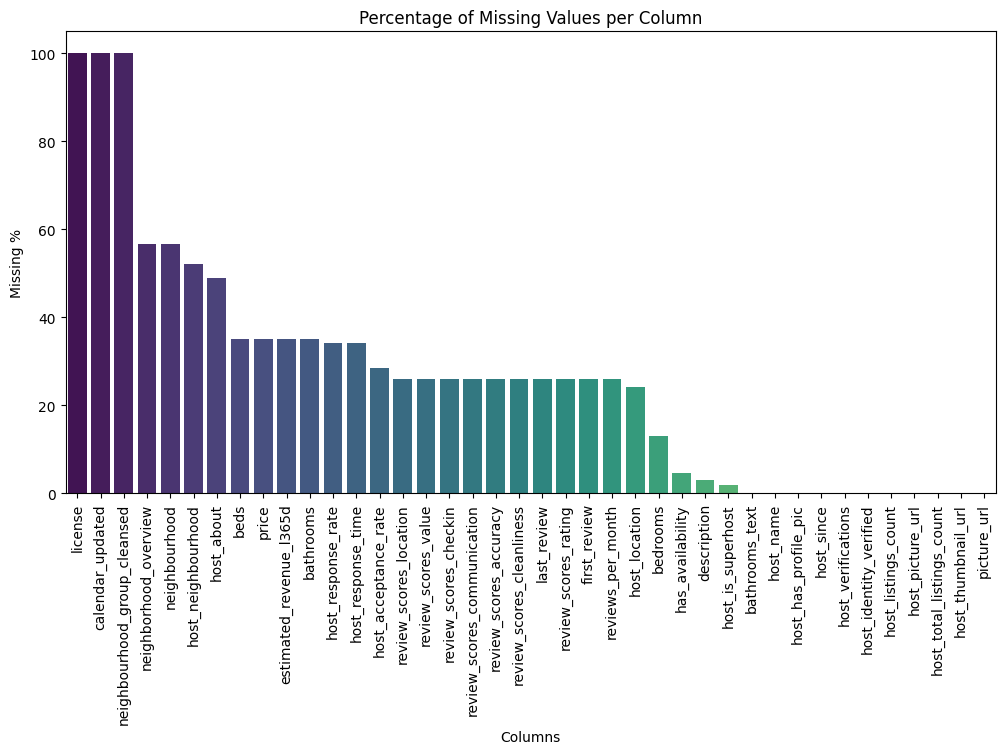

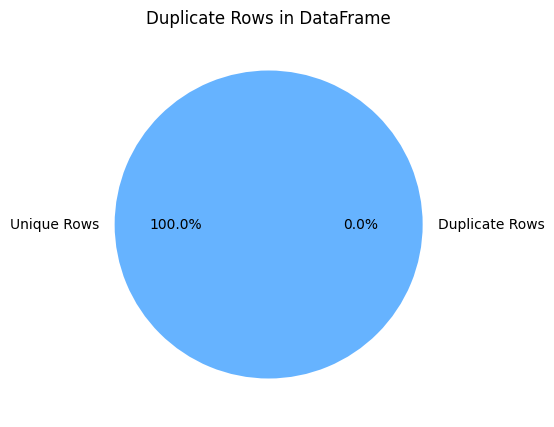

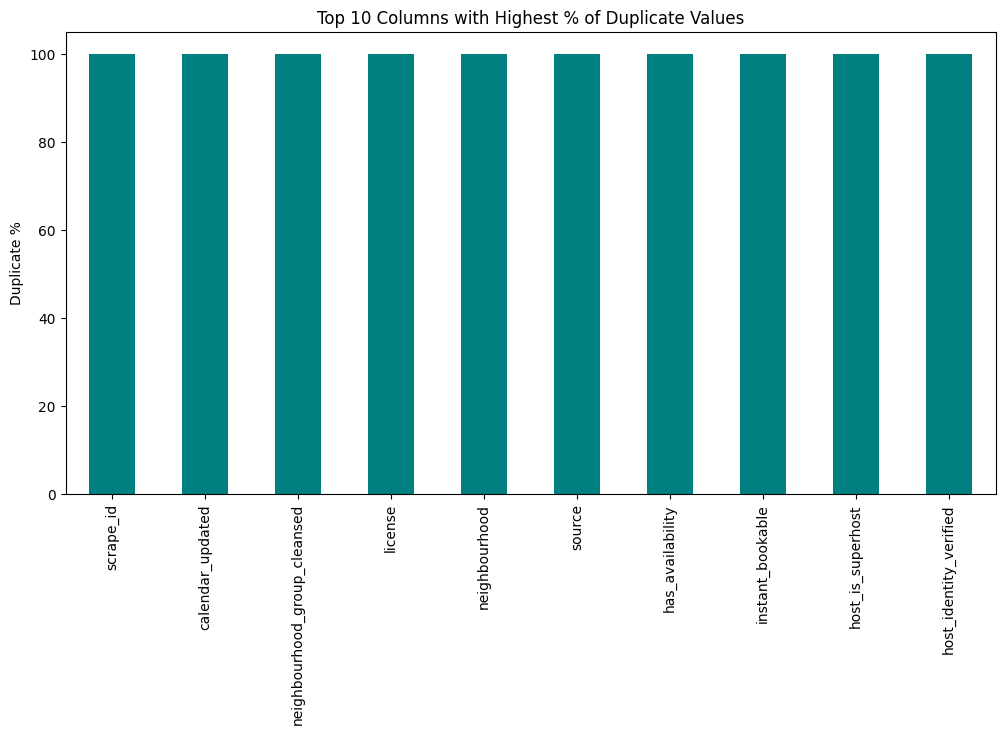

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Missing values visualization ----
plt.figure(figsize=(12,6))
sns.barplot(
    x=missing_df[missing_df['missing_count'] > 0].index,
    y=missing_df[missing_df['missing_count'] > 0]['missing_percent'],
    palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Missing %")
plt.xlabel("Columns")
plt.show()

# ---- Duplicate rows count ----
plt.figure(figsize=(5,5))
plt.pie(
    [listing_db.duplicated().sum(), len(listing_db)-listing_db.duplicated().sum()],
    labels=["Duplicate Rows", "Unique Rows"],
    autopct='%1.1f%%',
    colors=["#ff9999","#66b3ff"]
)
plt.title("Duplicate Rows in DataFrame")
plt.show()

# ---- Column-wise duplicates percentage ----
plt.figure(figsize=(12,6))
duplicate_percent.sort_values(ascending=False).head(10).plot(
    kind='bar', color='teal'
)
plt.title("Top 10 Columns with Highest % of Duplicate Values")
plt.ylabel("Duplicate %")
plt.show()


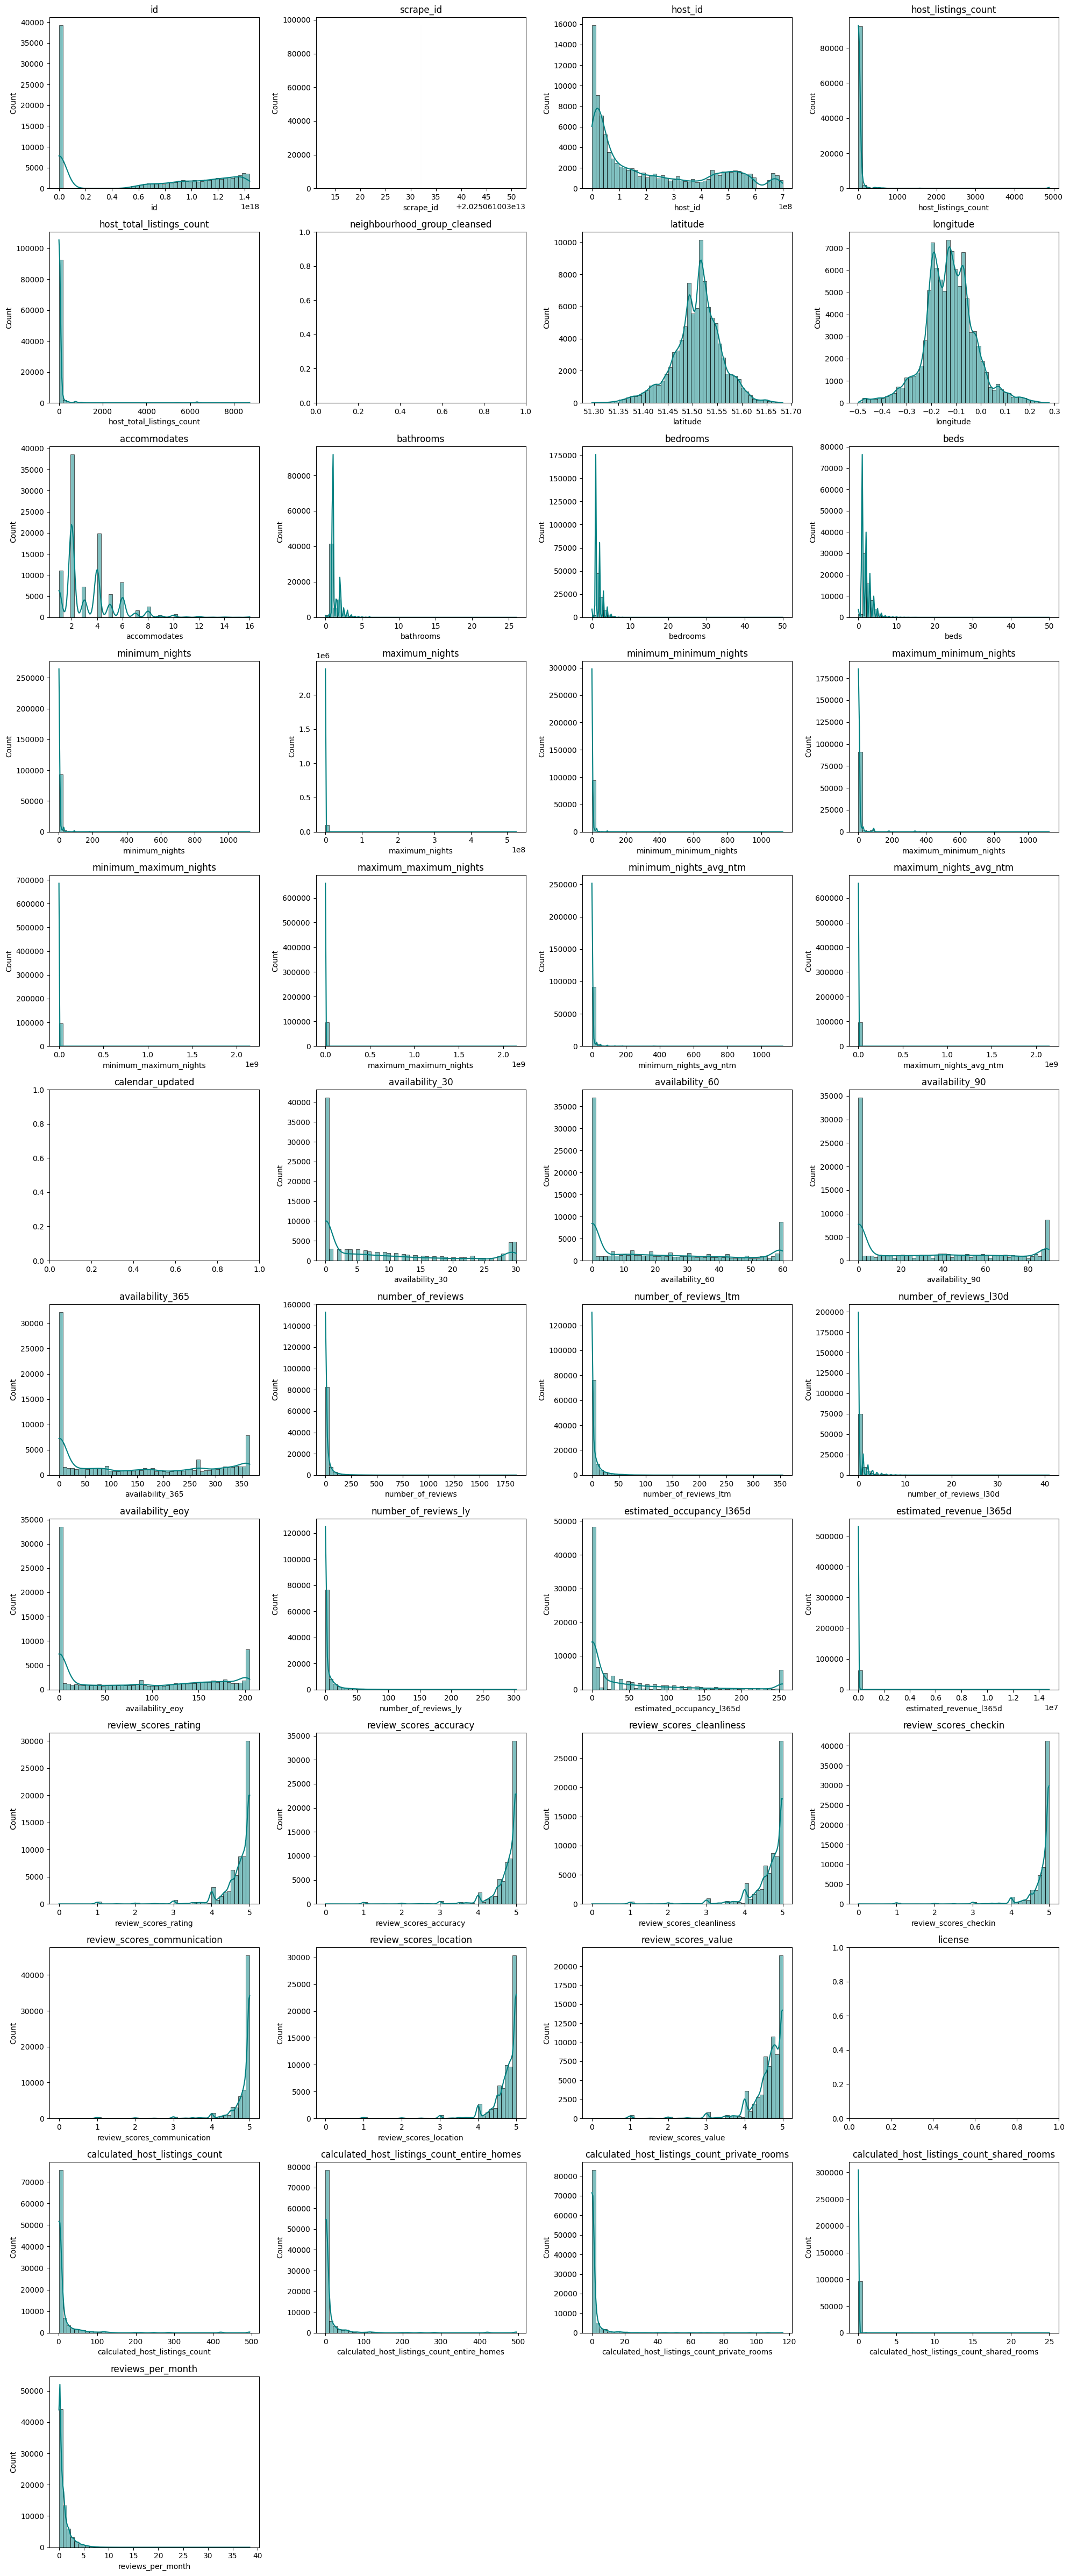

In [8]:
import math

num_cols = listing_db.select_dtypes(include=['int64','float64']).columns

n_cols = 4
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(20, 4*n_rows))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(listing_db[col].dropna(), bins=50, kde=True, color="teal")
    plt.title(col)

plt.tight_layout()
plt.show()


### Dropping Unnecessary Columns 
Columns that were not useful for analysis or had too many missing values

In [7]:
listing_db = listing_db.drop(columns=['license', 'bathrooms','calendar_updated', 'neighbourhood_group_cleansed', 'listing_url', 'scrape_id', 'source', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'])
listing_db.shape

(96651, 68)

In [8]:
print("Listings columns:", listing_db.columns)

Listings columns: Index(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
 

### Text Data Cleaning from columns Description, neighborhood_overview, host_name, host_about

In [9]:
import re
def normalize_text(text):
    if pd.isna(text):
        return "Not available"
    text = str(text).strip()
    # If text is too short or just punctuation, treat as missing
    if len(text) <= 3 and all(c in ".-," for c in text):
        return "Not available"
    return text

text_cols = ['description', 'neighborhood_overview', 'host_name', 'host_about']
for col in text_cols:
    listing_db[col] = listing_db[col].apply(normalize_text)


In [10]:
def clean_and_normalize(text):
    text = normalize_text(text)
    # Remove unwanted characters
    text = re.sub(r"[^a-zA-Z0-9\s\.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

for col in text_cols:
    listing_db[col] = listing_db[col].apply(clean_and_normalize)


In [11]:
listing_db.shape

(96651, 68)

### Checked neighbourhood column it has only Neighborhood highlights and NaN so i replaced NaN with the text "Neighborhood highlights"

In [12]:
pd.set_option("display.max_rows", None)
print(listing_db['neighbourhood'].value_counts(dropna=False))

neighbourhood
NaN                        54667
Neighborhood highlights    41984
Name: count, dtype: int64


In [13]:
listing_db['neighbourhood'] = listing_db['neighbourhood'].fillna("Neighborhood highlights")

In [14]:
pd.set_option("display.max_rows", None)
print(listing_db['neighbourhood'].value_counts(dropna=False))
print(listing_db.shape)

neighbourhood
Neighborhood highlights    96651
Name: count, dtype: int64
(96651, 68)


### Checking Host location column and just cleaning it for unwanted characters, spaces, symbols

In [ ]:
import re

# Fill missing
listing_db['host_location'] = listing_db['host_location'].fillna("United Kingdom")

# Clean text but keep letters, numbers, spaces, and commas
def clean_location(text):
    text = str(text)
    # Keep letters, numbers, spaces, commas
    text = re.sub(r"[^a-zA-Z0-9\s,]", "", text)
    # Replace multiple spaces with single space
    text = re.sub(r"\s+", " ", text).strip()
    return text

listing_db['host_location'] = listing_db['host_location'].apply(clean_location)


### Bathroom text column is having text data with values so need to remove text and convert Shared half-bath, half-bath, Private half-bath to 0.5 and it has 149 NaN so i fill NaN values with 1 as each property should have at least 1 bathroom and i keep ) bathroom as it is as data is available.

In [16]:
pd.set_option("display.max_rows", None)
print(listing_db['bathrooms_text'].value_counts(dropna=False))

bathrooms_text
1 bath               44864
2 baths              12616
1 shared bath        12055
1 private bath        8329
1.5 baths             5951
1.5 shared baths      2965
2.5 baths             2742
3 baths               1735
2 shared baths        1512
3.5 baths              757
2.5 shared baths       380
Shared half-bath       363
Half-bath              347
4 baths                343
0 baths                266
3 shared baths         263
Private half-bath      209
0 shared baths         197
4.5 baths              172
NaN                    149
5 baths                106
6 baths                 94
3.5 shared baths        46
5.5 baths               39
4 shared baths          27
6 shared baths          18
4.5 shared baths        16
5.5 shared baths        14
7 baths                 12
5 shared baths          10
6.5 baths                9
8 baths                  6
10 shared baths          6
10 baths                 5
9 baths                  4
8.5 baths                3
7.5 baths    

In [18]:
import pandas as pd
import numpy as np

def convert_bathrooms(x):
    if pd.isna(x) or str(x).strip() == '':
        return np.nan
    x_str = str(x).lower().strip()
    if 'half' in x_str:
        return 0.5
    elif '0' in x_str:
        return 0
    try:
        return float(x_str.split()[0])
    except:
        return np.nan

listing_db['bathrooms_text'] = listing_db['bathrooms_text'].apply(convert_bathrooms)
listing_db['bathrooms_text'] = listing_db['bathrooms_text'].fillna(1)

In [98]:
listing_db['bathrooms_text'].dtype

dtype('float64')

### Some listings do not specify the number of bedrooms. For these missing values, we assume 1 bedroom as a reasonable default.

In [21]:
# Bedrooms
listing_db['bedrooms'] = listing_db['bedrooms'].fillna(1)

# Beds
listing_db['beds'] = listing_db['beds'].fillna(listing_db['accommodates'])
listing_db['beds'] = listing_db['beds'].fillna(1)

### Checked for host_response_rate and host_acceptance_rate ... it contains % sign so need to convert and fill it as median value to fill NaN

In [22]:
pd.set_option("display.max_rows", None)
print(listing_db['host_response_rate'].value_counts(dropna=False))

host_response_rate
100%    44842
NaN     33024
0%       1990
99%      1737
90%      1551
98%      1372
97%      1031
96%       926
94%       749
80%       713
50%       697
92%       645
87%       577
67%       384
95%       369
89%       368
91%       367
83%       363
88%       347
93%       331
70%       309
75%       296
86%       292
60%       246
33%       232
78%       211
40%       194
71%       163
30%       142
82%       136
20%       134
10%       117
85%       115
57%       113
62%       109
25%        95
59%        91
73%        86
76%        82
21%        73
63%        73
74%        65
17%        61
56%        57
55%        44
53%        43
61%        43
79%        38
72%        36
84%        32
81%        32
43%        28
64%        28
38%        28
69%        25
58%        24
14%        24
77%        23
8%         22
44%        22
29%        21
11%        21
54%        19
45%        19
3%         18
27%        18
13%        16
4%         16
15%        16
68%        14
9

In [23]:
listing_db['host_response_rate'] = listing_db['host_response_rate'].str.rstrip('%')
listing_db['host_acceptance_rate'] = listing_db['host_acceptance_rate'].str.rstrip('%')

listing_db['host_response_rate'] = pd.to_numeric(listing_db['host_response_rate'], errors='coerce')
listing_db['host_acceptance_rate'] = pd.to_numeric(listing_db['host_acceptance_rate'], errors='coerce')

listing_db['host_response_rate'] = listing_db['host_response_rate'].fillna(listing_db['host_response_rate'].median())
listing_db['host_acceptance_rate'] = listing_db['host_acceptance_rate'].fillna(listing_db['host_acceptance_rate'].median())


### has_availability: Indicates if the listing is currently available. Missing values are filled with 't' (true), assuming the listing is available.

host_is_superhost, host_has_profile_pic, host_identity_verified: Represent whether the host is a superhost, has a profile picture, or is identity verified. Missing values in these columns are filled with 'f' (false), assuming the host does not meet these criteria.

In [25]:
listing_db['has_availability'] = listing_db['has_availability'].fillna('t')

In [26]:
listing_db['host_is_superhost'] = listing_db['host_is_superhost'].fillna('f')

In [27]:
listing_db['host_has_profile_pic'] = listing_db['host_has_profile_pic'].fillna('f')

In [28]:
listing_db['host_identity_verified'] = listing_db['host_identity_verified'].fillna('f')

### The host_verifications column contains a list of methods a host has used to verify their identity (e.g., email, phone, government ID). However, the data can appear in multiple formats:

#### NaN or empty list → no verification info provided
#### String representation of a list → e.g., "['email', 'phone']"
#### Actual Python list → e.g., ['email', 'phone', 'gov_id']
#### To standardize this column: Missing or empty values are replaced with ['email', 'phone'] as a default verification method.

In [30]:
import ast
import pandas as pd

def normalize_verifications(x):
    # If NaN, replace with default
    if pd.isna(x) or x == []:
        return ['email', 'phone']
    # If it is already a list, check if empty
    elif isinstance(x, list):
        return x if x else ['email', 'phone']
    # If it's a string representation of a list, convert it
    elif isinstance(x, str):
        try:
            lst = ast.literal_eval(x)
            return lst if lst else ['email', 'phone']
        except:
            return ['email', 'phone']
    else:
        return ['email', 'phone']


listing_db['host_verifications'] = listing_db['host_verifications'].apply(normalize_verifications)

In [31]:
pd.set_option("display.max_rows", None)
print(listing_db['host_verifications'].value_counts(dropna=False))

host_verifications
[email, phone]                  75307
[email, phone, work_email]      11098
[phone]                          9358
[phone, work_email]               548
[email]                           321
[email, work_email]                16
[email, phone, photographer]        3
Name: count, dtype: int64


In [32]:
missing = listing_db.isnull().sum()
missing[missing > 0]

host_since                        38
host_response_time             33024
host_neighbourhood             50360
host_listings_count               38
host_total_listings_count         38
price                          33967
estimated_revenue_l365d        33967
first_review                   25164
last_review                    25164
review_scores_rating           25164
review_scores_accuracy         25179
review_scores_cleanliness      25173
review_scores_checkin          25208
review_scores_communication    25185
review_scores_location         25209
review_scores_value            25209
reviews_per_month              25164
dtype: int64

### Handling Missing Review Scores
#### The dataset contains several columns related to review scores and review frequency:
#### Some listings have no reviews at all (number_of_reviews == 0). For these listings:
#### All review-related columns are missing (NaN) because no reviews exist.
#### To handle this, we fill these missing values with 0, indicating that there are no scores or reviews.

In [33]:
fill_cols = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

# Condition: number_of_reviews == 0
mask = (listing_db['number_of_reviews'] == 0)

listing_db.loc[mask, fill_cols] = listing_db.loc[mask, fill_cols].fillna(0)

In [34]:
missing = listing_db.isnull().sum()
missing[missing > 0]


host_since                        38
host_response_time             33024
host_neighbourhood             50360
host_listings_count               38
host_total_listings_count         38
price                          33967
estimated_revenue_l365d        33967
first_review                   25164
last_review                    25164
review_scores_accuracy            15
review_scores_cleanliness          9
review_scores_checkin             44
review_scores_communication       21
review_scores_location            45
review_scores_value               45
dtype: int64

### Filling Missing Review Subscores
#### The dataset contains detailed review subscores for each listing: Compute the median value for each subscore. Fill missing entries with the median of that column. This approach is robust, as the median is less affected by extreme values than the mean.

In [35]:
review_cols = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

for col in review_cols:
    median_val = listing_db[col].median()
    listing_db[col] = listing_db[col].fillna(median_val)

In [36]:
missing = listing_db.isnull().sum()
missing[missing > 0]

host_since                      38
host_response_time           33024
host_neighbourhood           50360
host_listings_count             38
host_total_listings_count       38
price                        33967
estimated_revenue_l365d      33967
first_review                 25164
last_review                  25164
dtype: int64

### Filling Missing Host Listings Counts
#### The dataset contains information about how many listings a host manages: host_listings_count: Number of listings currently active for the host. host_total_listings_count: Total number of listings the host has ever had. Some hosts have missing values in these columns. To handle this: Missing values are filled with 1, assuming that the host has at least one listing.

In [38]:
listing_db['host_listings_count'] = listing_db['host_listings_count'].fillna(1)
listing_db['host_total_listings_count'] = listing_db['host_total_listings_count'].fillna(1)

In [39]:
missing = listing_db.isnull().sum()
missing[missing > 0]

host_since                    38
host_response_time         33024
host_neighbourhood         50360
price                      33967
estimated_revenue_l365d    33967
first_review               25164
last_review                25164
dtype: int64

In [40]:
pd.set_option("display.max_rows", None)
print(listing_db['host_location'].value_counts(dropna=False))

host_location
London, United Kingdom                                      52802
United Kingdom                                              24005
England, United Kingdom                                     10605
Dubai, United Arab Emirates                                   628
Paris, France                                                 248
New York, NY                                                  165
Richmond, United Kingdom                                      123
City of Westminster, United Kingdom                           118
Sydney, Australia                                             108
Bristol, United Kingdom                                       106
Twickenham, United Kingdom                                    100
Croydon, United Kingdom                                        93
Kingston upon Thames, United Kingdom                           91
Harrow, United Kingdom                                         84
Oxford, United Kingdom                                        

### Simplifying host_location
#### The host_location column contains the location of each host. To simplify analysis: Hosts located in anywhere in the United Kingdom are kept as 'United Kingdom'. Hosts outside the UK are grouped as 'Other'.

In [41]:
listing_db['host_location'] = listing_db['host_location'].apply(
    lambda x: x if 'United Kingdom' in x else 'Other'
)

In [42]:
pd.set_option("display.max_rows", None)
print(listing_db['host_location'].value_counts(dropna=False))

host_location
London, United Kingdom                                      52802
United Kingdom                                              24005
England, United Kingdom                                     10605
Other                                                        4350
Richmond, United Kingdom                                      123
City of Westminster, United Kingdom                           118
Bristol, United Kingdom                                       106
Twickenham, United Kingdom                                    100
Croydon, United Kingdom                                        93
Kingston upon Thames, United Kingdom                           91
Harrow, United Kingdom                                         84
Oxford, United Kingdom                                         83
Wembley, United Kingdom                                        81
Manchester, United Kingdom                                     81
Edinburgh, United Kingdom                                     

In [43]:
listing_db.shape

(96651, 68)

In [44]:
missing = listing_db.isnull().sum()
missing[missing > 0]

host_since                    38
host_response_time         33024
host_neighbourhood         50360
price                      33967
estimated_revenue_l365d    33967
first_review               25164
last_review                25164
dtype: int64

#### Host since has date time values so better to delete 38 rows instead of filling random values.

In [45]:
cols_to_check = [
    'host_since',
]

listing_db = listing_db.dropna(subset=cols_to_check)

### host_response_time has text based values so filled no response for nan values

In [47]:
pd.set_option("display.max_rows", None)
print(listing_db['host_response_time'].value_counts(dropna=False))

host_response_time
within an hour        43573
NaN                   32986
within a few hours     9640
within a day           6995
a few days or more     3419
Name: count, dtype: int64


In [48]:
listing_db['host_response_time'] = listing_db['host_response_time'].fillna('no response')

In [49]:
pd.set_option("display.max_rows", None)
print(listing_db['host_response_time'].value_counts(dropna=False))

host_response_time
within an hour        43573
no response           32986
within a few hours     9640
within a day           6995
a few days or more     3419
Name: count, dtype: int64


In [50]:
pd.set_option("display.max_rows", None)
print(listing_db['host_response_rate'].value_counts(dropna=False))

host_response_rate
100.0    77828
0.0       1990
99.0      1737
90.0      1551
98.0      1372
97.0      1031
96.0       926
94.0       749
80.0       713
50.0       697
92.0       645
87.0       577
67.0       384
95.0       369
89.0       368
91.0       367
83.0       363
88.0       347
93.0       331
70.0       309
75.0       296
86.0       292
60.0       246
33.0       232
78.0       211
40.0       194
71.0       163
30.0       142
82.0       136
20.0       134
10.0       117
85.0       115
57.0       113
62.0       109
25.0        95
59.0        91
73.0        86
76.0        82
21.0        73
63.0        73
74.0        65
17.0        61
56.0        57
55.0        44
53.0        43
61.0        43
79.0        38
72.0        36
84.0        32
81.0        32
43.0        28
64.0        28
38.0        28
69.0        25
58.0        24
14.0        24
77.0        23
8.0         22
44.0        22
29.0        21
11.0        21
54.0        19
45.0        19
3.0         18
27.0        18
13.0  

In [51]:
listing_db['host_response_rate'] = listing_db['host_response_rate'].fillna(0)

In [52]:
pd.set_option("display.max_rows", None)
print(listing_db['host_response_rate'].value_counts(dropna=False))

host_response_rate
100.0    77828
0.0       1990
99.0      1737
90.0      1551
98.0      1372
97.0      1031
96.0       926
94.0       749
80.0       713
50.0       697
92.0       645
87.0       577
67.0       384
95.0       369
89.0       368
91.0       367
83.0       363
88.0       347
93.0       331
70.0       309
75.0       296
86.0       292
60.0       246
33.0       232
78.0       211
40.0       194
71.0       163
30.0       142
82.0       136
20.0       134
10.0       117
85.0       115
57.0       113
62.0       109
25.0        95
59.0        91
73.0        86
76.0        82
21.0        73
63.0        73
74.0        65
17.0        61
56.0        57
55.0        44
53.0        43
61.0        43
79.0        38
72.0        36
84.0        32
81.0        32
43.0        28
64.0        28
38.0        28
69.0        25
58.0        24
14.0        24
77.0        23
8.0         22
44.0        22
29.0        21
11.0        21
54.0        19
45.0        19
3.0         18
27.0        18
13.0  

In [53]:
pd.set_option("display.max_rows", None)
print(listing_db['host_acceptance_rate'].value_counts(dropna=False))

host_acceptance_rate
97.0     29901
100.0    23917
99.0      5640
98.0      3787
0.0       3616
96.0      1776
95.0      1465
50.0      1396
92.0      1127
94.0      1122
67.0      1086
93.0      1061
90.0       945
75.0       943
91.0       800
86.0       792
80.0       785
88.0       770
83.0       712
89.0       677
44.0       671
33.0       586
78.0       503
60.0       492
82.0       466
85.0       457
71.0       448
77.0       441
40.0       423
25.0       407
87.0       393
79.0       363
73.0       345
84.0       338
81.0       312
70.0       276
43.0       264
63.0       260
57.0       252
53.0       241
72.0       225
56.0       222
69.0       209
38.0       202
68.0       202
74.0       201
20.0       200
47.0       194
62.0       192
64.0       188
76.0       167
52.0       164
54.0       163
65.0       162
58.0       159
61.0       158
17.0       156
46.0       148
41.0       142
29.0       139
55.0       138
27.0       132
36.0       128
14.0       126
35.0       121
45.0

In [54]:
median_acceptance = listing_db['host_acceptance_rate'].median()
listing_db['host_acceptance_rate'] = listing_db['host_acceptance_rate'].fillna(median_acceptance)

In [55]:
pd.set_option("display.max_rows", None)
print(listing_db['host_acceptance_rate'].value_counts(dropna=False))

host_acceptance_rate
97.0     29901
100.0    23917
99.0      5640
98.0      3787
0.0       3616
96.0      1776
95.0      1465
50.0      1396
92.0      1127
94.0      1122
67.0      1086
93.0      1061
90.0       945
75.0       943
91.0       800
86.0       792
80.0       785
88.0       770
83.0       712
89.0       677
44.0       671
33.0       586
78.0       503
60.0       492
82.0       466
85.0       457
71.0       448
77.0       441
40.0       423
25.0       407
87.0       393
79.0       363
73.0       345
84.0       338
81.0       312
70.0       276
43.0       264
63.0       260
57.0       252
53.0       241
72.0       225
56.0       222
69.0       209
38.0       202
68.0       202
74.0       201
20.0       200
47.0       194
62.0       192
64.0       188
76.0       167
52.0       164
54.0       163
65.0       162
58.0       159
61.0       158
17.0       156
46.0       148
41.0       142
29.0       139
55.0       138
27.0       132
36.0       128
14.0       126
35.0       121
45.0

In [56]:
pd.set_option("display.max_rows", None)
print(listing_db['host_neighbourhood'].value_counts(dropna=False))

host_neighbourhood
NaN                                  50322
Tyburnia                              1309
Pimlico                               1185
Hampstead                             1169
South Kensington                      1132
Shoreditch                            1093
Nine Elms                              835
LB of Islington                        822
Battersea                              813
Bayswater                              801
LB of Brent                            799
LB of Haringey                         757
Hammersmith                            669
Bethnal Green                          652
Marylebone                             652
LB of Hackney                          636
Notting Hill                           591
Kensington                             590
Bow                                    588
Covent Garden                          580
Finsbury Park                          550
Chiswick                               550
Fulham                             

In [57]:
listing_db['host_neighbourhood'] = listing_db['host_neighbourhood'].fillna('Unknown')

In [58]:
pd.set_option("display.max_rows", None)
print(listing_db['host_neighbourhood'].value_counts(dropna=False))

host_neighbourhood
Unknown                              50322
Tyburnia                              1309
Pimlico                               1185
Hampstead                             1169
South Kensington                      1132
Shoreditch                            1093
Nine Elms                              835
LB of Islington                        822
Battersea                              813
Bayswater                              801
LB of Brent                            799
LB of Haringey                         757
Hammersmith                            669
Bethnal Green                          652
Marylebone                             652
LB of Hackney                          636
Notting Hill                           591
Kensington                             590
Bow                                    588
Covent Garden                          580
Finsbury Park                          550
Chiswick                               550
Fulham                             

In [59]:
missing = listing_db.isnull().sum()
missing[missing > 0]

price                      33955
estimated_revenue_l365d    33955
first_review               25152
last_review                25152
dtype: int64

In [60]:
listing_db.shape

(96613, 68)

### for price removed the $ symbol and checked median value and fill with median values 

In [61]:
listing_db['price'] = listing_db['price'].replace('[\$,]', '', regex=True).astype(float)

In [62]:
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99, 0.997]

price_stats = listing_db['price'].describe(percentiles=percentiles)

print(price_stats)

count    62658.000000
mean       213.393677
std        861.076365
min          6.000000
25%         75.000000
50%        135.000000
75%        225.000000
90%        371.000000
95%        518.000000
98%        841.000000
99%       1136.860000
99.7%     2320.319000
max      74100.000000
Name: price, dtype: float64


In [63]:
listing_db['price'].value_counts(dropna=False)

price
NaN        33955
50.0         708
45.0         647
90.0         615
60.0         549
100.0        531
135.0        524
180.0        514
150.0        506
80.0         471
200.0        470
120.0        466
40.0         447
68.0         444
72.0         440
54.0         428
70.0         422
95.0         414
65.0         402
55.0         401
86.0         399
63.0         397
59.0         388
48.0         383
75.0         382
81.0         381
41.0         379
64.0         374
140.0        366
108.0        361
110.0        360
43.0         354
99.0         345
36.0         335
160.0        330
52.0         330
126.0        328
77.0         326
85.0         324
35.0         320
56.0         313
113.0        311
117.0        310
162.0        308
144.0        302
38.0         302
51.0         298
57.0         296
105.0        288
62.0         287
130.0        286
114.0        286
47.0         284
225.0        282
170.0        281
250.0        276
44.0         276
49.0         274
46.0    

In [64]:
median_price = listing_db['price'].median()
listing_db['price'] = listing_db['price'].fillna(median_price)

print(listing_db['price'].describe())

count    96613.000000
mean       185.841926
std        694.452556
min          6.000000
25%        106.000000
50%        135.000000
75%        168.000000
max      74100.000000
Name: price, dtype: float64


### same for estimated_revenue_l365d filled with median values

In [65]:
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99, 0.997]

revenue_stats = listing_db['estimated_revenue_l365d'].describe(percentiles=percentiles)

print(revenue_stats)

count    6.265800e+04
mean     1.106345e+04
std      9.293395e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.775000e+03
75%      1.206200e+04
90%      2.781000e+04
95%      4.290060e+04
98%      6.681000e+04
99%      8.976000e+04
99.7%    1.415758e+05
max      1.479000e+07
Name: estimated_revenue_l365d, dtype: float64


In [66]:
median_revenue = listing_db['estimated_revenue_l365d'].median()
listing_db['estimated_revenue_l365d'] = listing_db['estimated_revenue_l365d'].replace(0, median_revenue).fillna(median_revenue)

### Now only has 2 colums with NaN as both are datetime values so can't fill random dates. 

In [67]:
missing = listing_db.isnull().sum()
missing[missing > 0]

first_review    25152
last_review     25152
dtype: int64

In [68]:
print(listing_db.shape)
listing_db.head(10)

(96613, 68)


,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,2025-06-11,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.84,4.74,4.62,4.72,t,11,11,0,0,0.51
1,264777,2025-06-11,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,Not available,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.58,4.25,4.54,4.42,t,11,11,0,0,0.22
2,264778,2025-06-11,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.72,4.52,4.36,4.38,t,11,11,0,0,0.43
3,264779,2025-06-11,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.83,4.61,4.50,4.47,t,11,11,0,0,0.30
4,264780,2025-06-11,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,Not available,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.81,4.74,4.37,4.59,t,11,11,0,0,0.35
5,264781,2025-06-11,Two Bedrooms Garden Maisonette,"A two bedroom, 2 bathroom ground floor apartme...",Catford is an up and coming London suburb. The...,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.88,4.63,4.50,4.13,t,11,11,0,0,0.09
6,264782,2025-06-11,One Bedroom Garden Apartment,A large and sunny one bedroom ground floor apa...,Catford is a well established London suburb. T...,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.76,4.71,4.53,4.65,t,11,11,0,0,0.20
7,264783,2025-06-11,Four Bedroom Garden Apartment,A large and sunny four bedroom ground floor ap...,Catford is a well established London suburb. T...,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.75,4.77,4.52,4.48,t,11,11,0,0,0.31
8,264789,2025-06-11,Huge Three Bedroom Flat with parking and terrace,A large and sunny four bedroom first floor apa...,Catford is a well established London suburb. T...,1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,...,4.97,4.88,4.49,4.68,t,11,11,0,0,0.52
9,266037,2025-06-12,Central London with Stunning Views!,Weve welcomed over 500 guests and received exc...,Our local area has an array of independent caf...,1395281,James,2011-11-11,"England, United Kingdom","Im a culture vulture... Art, music, opera, fil...",...,4.92,4.92,4.94,4.84,f,1,0,1,0,3.22


In [ ]:
# listing_db.to_csv("listings_cleaned_512.csv",
#                   index=False,
#                   encoding='utf-8',
#                   float_format='%.2f')

In [ ]:
import pandas as pd
listing_db_load = pd.read_csv("cleaned_listings_512.csv",
                              encoding='utf-8',
                              low_memory=False)
print(listing_db_load.dtypes)
print(listing_db_load.shape)


id                                                int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 68, dtype: object
(96613, 68)


In [4]:
listing_db_load.shape

(96613, 68)

In [5]:
missing = listing_db_load.isnull().sum()
missing[missing > 0]

description         5
host_name          44
host_about         54
first_review    25152
last_review     25152
dtype: int64

In [100]:
import pandas as pd
reviews_db = pd.read_csv("cleaned_reviews.csv")
reviews_db.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [102]:
missing = reviews_db.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)